# (Core) Preparing Time Series from Wide-Form Data
- Daniel Barella
- 3/29/23

You will be working with Zillow's publicly available Zillow House Value Index (ZHVI) https://www.zillow.com/research/data/

- Specifically, you will be using the Home Value data set for:
    - Data Type = "ZHVI All Homes (SFR+Condo/Coop) - Time Series - Smoothed - Seasonally Adjusted"
    - Geography = "City"
- We have already downloaded the file for you and uploaded it to Google Drive.
    - Share URL: https://drive.google.com/file/d/1O_g44QAfe3uVF-1heAC0BAeVDoWloVR-/view?usp=sharing
    - Direct URL (for Pandas): https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv
## Task
## Part 1
- First, you will prepare the dataset for time series analysis:
    - Load in the Zillow Home Value Index dataframe.
        - Note: it is a large file and may take a minute to load.
    - Filter the 4 largest cities into a new dataframe.
        - Tip: the "SizeRank" column has already ranked the cities by size. The larger the city, the smaller the rank value.
            - Therefore the 4 largest cities would have rank values of [0,1,2,3]
    - Melt the data to long-form and prepare it for time series analysis.
        - Convert the melted dates into datetime datatype.
        - Make the datetime column the index.
    - Resample the dataframe as monthly frequency, grouped by City.
## Part 2
- Once you've prepared the dataframe with the time series data for the 4 largest cities:
    - Plot the home values for all 4 cities. (Hint: use unstack)
        - Make sure to add a title and axis labels.
        - Reformat the y-axis ticks to use thousands of dollars with a "K" at the end. (e.g. "200K, 400K, etc")
            - Hint: use the FuncFormatter from matplotlib.
    - Answer the following 2 questions using pandas:
        - 1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?
            - Hint: use either pd.IndexSlice or .unstack() to get the answer.
        - 2) How much did the home values change from November 2008 to December 2008 (in dollars)?
            - Hint: you can use .diff() to calculate the change in values

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import seaborn as sns
import os
# set random seed
SEED = 321
np.random.seed(SEED)

# Part 1

### Load in the Zillow Home Value Index dataframe.


In [2]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv")
display(df.head())
df.info

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


<bound method DataFrame.info of        RegionID  SizeRank      RegionName RegionType StateName State  \
0          6181         0        New York       city        NY    NY   
1         12447         1     Los Angeles       city        CA    CA   
2         39051         2         Houston       city        TX    TX   
3         17426         3         Chicago       city        IL    IL   
4          6915         4     San Antonio       city        TX    TX   
...         ...       ...             ...        ...       ...   ...   
22462    236350     28439       Palisades       city        TX    TX   
22463     40403     28439  Port Mansfield       city        TX    TX   
22464     54740     28439     Tribes Hill       city        NY    NY   
22465    249186     28439    Derby Center       city        VT    VT   
22466     42575     28439        Quinwood       city        WV    WV   

                                       Metro          CountyName  2000-01-31  \
0      New York-Newark-

### Filter the 4 largest cities into a new dataframe.


In [3]:
df_largest_cities = df.iloc[[0, 1, 2, 3]]
df_largest_cities

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


### Melt the data to long-form and prepare it for time series analysis.


In [4]:
melted = pd.melt(df_largest_cities,
                 id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'Metro', 'CountyName'],
                 value_name='Home Value',
                 var_name='Date')
melted


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Home Value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [5]:
melted.isna().sum()

RegionID      0
SizeRank      0
RegionName    0
RegionType    0
StateName     0
State         0
Metro         0
CountyName    0
Date          0
Home Value    5
dtype: int64

In [6]:
melted = melted.interpolate(method='linear')

In [7]:
melted.isna().sum()

RegionID      0
SizeRank      0
RegionName    0
RegionType    0
StateName     0
State         0
Metro         0
CountyName    0
Date          0
Home Value    0
dtype: int64

- Convert the melted dates into datetime datatype.


In [8]:
melted['Date'] = pd.to_datetime(melted['Date'])
melted.info()
melted.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    1092 non-null   int64         
 1   SizeRank    1092 non-null   int64         
 2   RegionName  1092 non-null   object        
 3   RegionType  1092 non-null   object        
 4   StateName   1092 non-null   object        
 5   State       1092 non-null   object        
 6   Metro       1092 non-null   object        
 7   CountyName  1092 non-null   object        
 8   Date        1092 non-null   datetime64[ns]
 9   Home Value  1092 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 85.4+ KB


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Home Value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0


- Make the datetime column the index.


In [9]:
melted = melted.set_index('Date')
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Home Value
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0
...,...,...,...,...,...,...,...,...,...
2022-08-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,315587.0
2022-09-30,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,781622.0
2022-09-30,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,966595.0


### Resample the dataframe as monthly frequency, grouped by City.


In [10]:
ts = melted.copy()

In [11]:
ts.index

DatetimeIndex(['2000-01-31', '2000-01-31', '2000-01-31', '2000-01-31',
               '2000-02-29', '2000-02-29', '2000-02-29', '2000-02-29',
               '2000-03-31', '2000-03-31',
               ...
               '2022-07-31', '2022-07-31', '2022-08-31', '2022-08-31',
               '2022-08-31', '2022-08-31', '2022-09-30', '2022-09-30',
               '2022-09-30', '2022-09-30'],
              dtype='datetime64[ns]', name='Date', length=1092, freq=None)

In [12]:
ts.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Home Value
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0


In [14]:
ts = ts.groupby('RegionName').resample('M').mean()
ts.head()

/var/folders/l7/w6kg6nmd3dgfd2wj06wwdb1c0000gn/T/ipykernel_66912/1896013077.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ts = ts.groupby('RegionName').resample('M').mean()
/var/folders/l7/w6kg6nmd3dgfd2wj06wwdb1c0000gn/T/ipykernel_66912/1896013077.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ts = ts.groupby('RegionName').resample('M').mean()
/var/folders/l7/w6kg6nmd3dgfd2wj06wwdb1c0000gn/T/ipykernel_66912/1896013077.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only 

RegionID  SizeRank  Home Value
RegionName Date                                      
Chicago    2000-01-31   17426.0       3.0    166139.0
           2000-02-29   17426.0       3.0    166536.0
           2000-03-31   17426.0       3.0    167368.0
           2000-04-30   17426.0       3.0    168826.0
           2000-05-31   17426.0       3.0    170499.0

In [15]:
ts = ts.drop(['RegionID', 'SizeRank'], axis=1)
ts

Home Value
RegionName Date                  
Chicago    2000-01-31    166139.0
           2000-02-29    166536.0
           2000-03-31    167368.0
           2000-04-30    168826.0
           2000-05-31    170499.0
...                           ...
New York   2022-05-31    768797.0
           2022-06-30    773944.0
           2022-07-31    777692.0
           2022-08-31    779960.0
           2022-09-30    781622.0

[1092 rows x 1 columns]

# Part 2

### Plot the home values for all 4 cities. (Hint: use unstack)


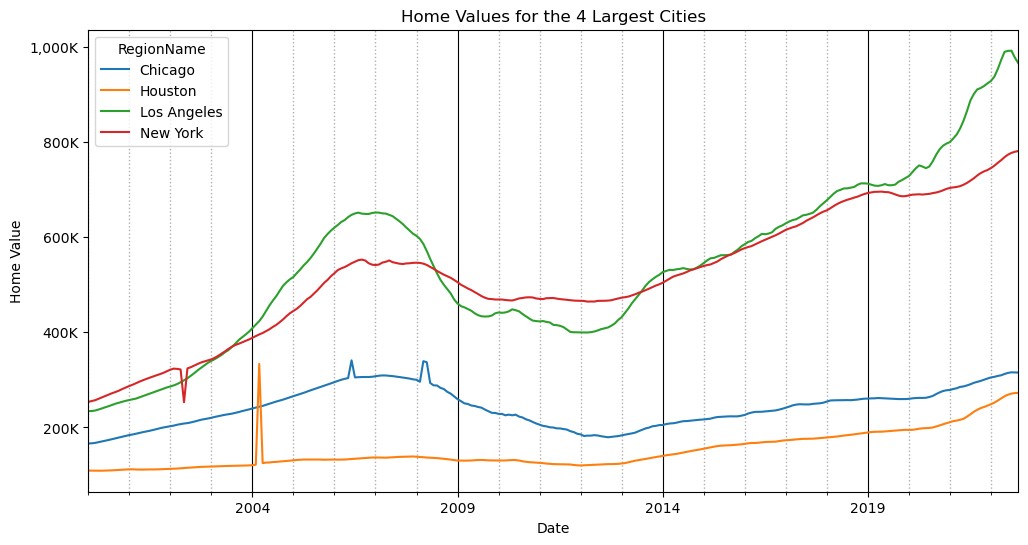

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))
unstacked = ts['Home Value'].unstack(level=0)
unstacked.plot(ax=ax)

# Set axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Home Value')
ax.set_title('Home Values for the 4 Largest Cities')

# Format y-axis ticks
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"

# Create the formatters
fmt_thous = mticks.FuncFormatter(thousands)
ax.yaxis.set_major_formatter(fmt_thous)

# Making major/minor gridlines visually different

ax.grid(which='minor',axis='x',ls=":",lw=1)
ax.grid(which='major',axis='x',color='k')


plt.show()


## 1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [17]:
# Use unstack() to transform DataFrame
unstacked = ts['Home Value'].unstack(level=0)

# Find maximum and minimum values for each city
max_value = unstacked.loc['2008-12-31'].max()
min_value = unstacked.loc['2008-12-31'].min()

# Find city with maximum and minimum values
city_with_max_value = unstacked.loc['2008-12-31'].idxmax()
city_with_min_value = unstacked.loc['2008-12-31'].idxmin()

# Print results
print(f"The city with the highest typical home value at the end of 2008 was {city_with_max_value} with a value of ${max_value:.0f}.")
print(f"The city with the lowest typical home value at the end of 2008 was {city_with_min_value} with a value of ${min_value:.0f}.")


The city with the highest typical home value at the end of 2008 was New York with a value of $510309.
The city with the lowest typical home value at the end of 2008 was Houston with a value of $131283.


## 2) How much did the home values change from November 2008 to December 2008 (in dollars)?

In [31]:
nov_val = ts.loc[(slice(None), '2008-11-30'), 'Home Value'].sum()
dec_val = ts.loc[(slice(None), '2008-12-31'), 'Home Value'].sum()

change = dec_val - nov_val

print(f"The home values changed by ${change:.2f} from November 2008 to December 2008.")


The home values changed by $-23786.00 from November 2008 to December 2008.
